In [32]:
import pandas_datareader as pdr
import matplotlib.ticker as ticker

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime
from mplfinance.original_flavor import candlestick2_ohlc
import os

In [33]:
kospi200_df = pd.read_csv(os.getcwd() + '\KOSPI200_Ticker.csv',encoding = 'cp949')
kospi200_df = kospi200_df.astype(str)
kospi200_df.rename(columns = {'종목코드' : 'Ticker','종목명':'Stock_symbol'},inplace = True)
kospi200_df = kospi200_df[['Ticker','Stock_symbol']].copy(deep = True)
kospi200_df['Ticker'] = kospi200_df['Ticker'].apply(lambda x : x.zfill(6))
kospi200_df


,Ticker,Stock_symbol
0,005930,삼성전자
1,000660,SK하이닉스
2,035420,NAVER
3,207940,삼성바이오로직스
4,051910,LG화학
...,...,...
195,064960,SNT모티브
196,071840,롯데하이마트
197,108670,LX하우시스
198,007570,일양약품


In [55]:
target = kospi200_df[kospi200_df['Stock_symbol']=='일양약품']
target

,Ticker,Stock_symbol
198,007570,일양약품


In [56]:
Ticker_number = target['Ticker'].to_string(header = False,index = False)
Stock_Symbol = target['Stock_symbol'].to_string(header = False,index = False)
start = datetime.datetime(2021,5,30)
end = datetime.datetime(2021,9,18)

In [57]:
table = pdr.naver.NaverDailyReader(Ticker_number,start,end).read()
table.tail(10)

table = table.astype(int)
x_date = table.index.astype(str)

D:\Jupyter\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Jupyter\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Jupyter\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Jupyter\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Jupyter\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Jupyter\envs\stock\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50577 missing from current font.
  font.

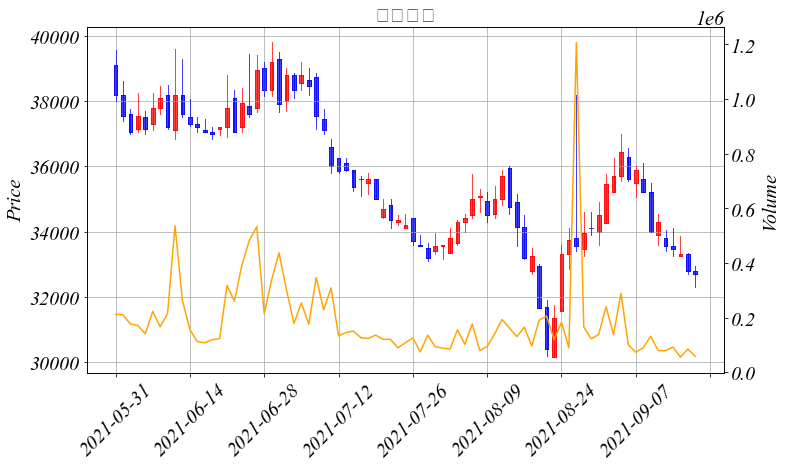

In [58]:
fig, ax = plt.subplots()

ax.plot(x_date,[numpy.nan for _ in range(len(x_date))])

candlestick2_ohlc(ax,table['Open'],table['High'],table['Low'],table['Close'],width=0.5,colorup='r',colordown='b')
plt.xticks(rotation=45)
plt.grid()





first_chart_color = 'black'
first_chart_xlabel_color = 'black'
first_chart_ylabel_color = 'black'


second_chart_color = 'orange'
second_chart_xlabel_color = 'black'
second_chart_ylabel_color = 'black'


ax2 = ax.twinx()
ax2.set_xscale('linear')

ax2.plot(x_date,table.Volume,color = second_chart_color)



ax.xaxis.set_major_locator(ticker.AutoLocator())

plt.title(Stock_Symbol,fontsize=20)
ax.set_ylabel('Price',color = first_chart_xlabel_color)
ax2.set_ylabel('Volume',color = first_chart_ylabel_color)



fig.tight_layout()
fig.set_size_inches(15,10,forward=True)

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20 
plt.rcParams['font.style'] = 'oblique'


plt.show()



# 이평선

In [59]:
ma5 = table['Close'].rolling(window = 5).mean()
ma10 = table['Close'].rolling(window = 10).mean()
ma30 = table['Close'].rolling(window = 30).mean()

table.insert(len(table.columns),"MA5",ma5)
table.insert(len(table.columns),"MA10",ma10)
table.insert(len(table.columns),"MA30",ma30)


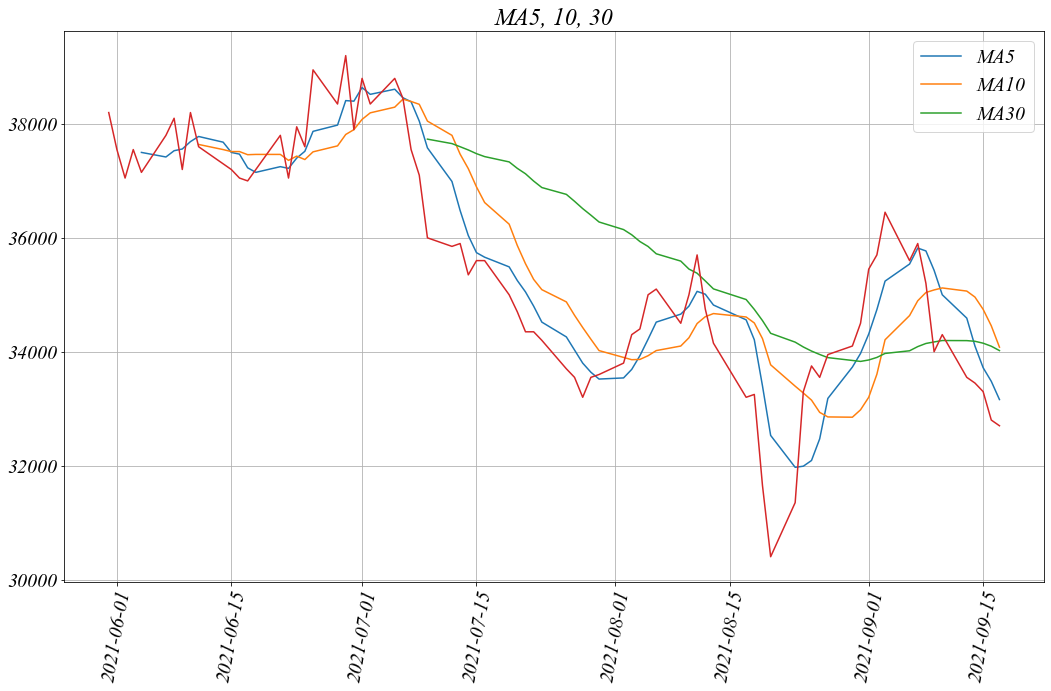

In [60]:
plt.figure(figsize=(15,10))
plt.plot(table[['MA5','MA10','MA30']],label=["MA5","MA10","MA30"])
plt.plot(table.index,table['Close'])
plt.legend(loc = 'best')
plt.xticks(rotation=80)
plt.title('MA5, 10, 30')

plt.tight_layout()


plt.grid()
plt.show()

In [61]:
# 추가 설명 (Yahoo Finance에서 종목코드 찾기)

# https://finance.yahoo.com에 접속해서
# 검색창에 희망하는 기업 영문명 입력
# 아래 기업 영문명 좌측 코드가 종목코드
#####
#Ticker = 종목코드
#www.krx.co.kr 에서 종목코드를 다운 받을 수 있음.